PART2:
To build a movie review sentiment classifier using Word2Vec, we'll follow the outlined tasks. Let's break down each step:

1. Perform Text EDA (Exploratory Data Analysis)
2. Clean the Text- remove noisy tokens like punctuations and stopwords
3. Train a Model Using Custom Skip-gram Vectors
4. Train a Model Using Custom CBoW Vectors
5. Train a Model Using a Pretrained Word2Vec Model’s Vectors
6. Check if you can improve the model performance for [2] and [3] by updating the vector length, window size, min count, etc.
7. Report Metrics for all experiments in a table at the end.

# 1. Perform Text EDA

C:\Users\riyad\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


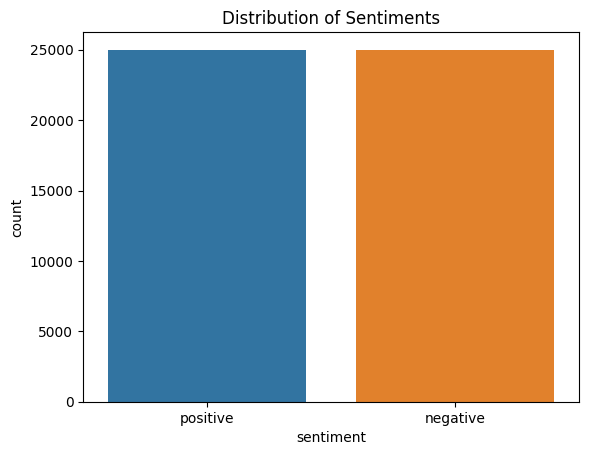

C:\Users\riyad\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


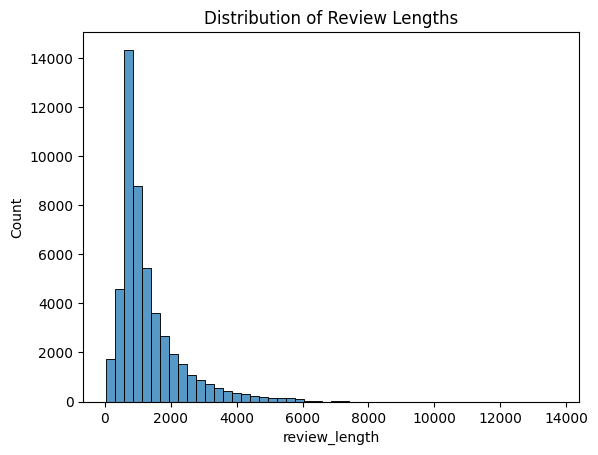

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Imdb.csv",encoding="latin1")

# Basic information about the dataset
print(df.info())
print(df.head())

# Distribution of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Length of reviews
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()


# 2. Clean the Text

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase and remove stopwords
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]
    return filtered_tokens

# Example DataFrame
data = {
    'text': ["This is a sample text.", "Another example of text."]
}
df = pd.DataFrame(data)

# Check column names
print(df.columns)

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Inspect the DataFrame
print(df.head())


Index(['text'], dtype='object')
                       text            processed_text
0    This is a sample text.            [sample, text]
1  Another example of text.  [another, example, text]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 3. Train a Model Using Custom Skip-gram Vectors

In [12]:
from gensim.models import Word2Vec
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'processed_text': [
        "This is a sample text",
        "Another example of a text",`
        "More sample text data"
    ]
})

# Ensure the text is tokenized
def tokenize(text):
    if isinstance(text, str):
        return text.split()
    return text

# Tokenize reviews
df['tokenized_review'] = df['processed_text'].apply(tokenize)

# Train Word2Vec model using Skip-gram
w2v_skipgram = Word2Vec(df['tokenized_review'], vector_size=100, window=5, min_count=2, sg=1)

# Function to vectorize reviews
def vectorize_text(text, model):
    vector = []
    for word in text:
        if word in model.wv.key_to_index:
            vector.append(model.wv[word])
    return vector

# Vectorize reviews
df['skipgram_vectors'] = df['tokenized_review'].apply(lambda x: vectorize_text(x, w2v_skipgram))

print(df[['tokenized_review', 'skipgram_vectors']])


                  tokenized_review  \
0      [This, is, a, sample, text]   
1  [Another, example, of, a, text]   
2       [More, sample, text, data]   

                                    skipgram_vectors  
0  [[9.456396e-05, 0.0030773198, -0.006812645, -0...  
1  [[9.456396e-05, 0.0030773198, -0.006812645, -0...  
2  [[-0.0086196875, 0.003665738, 0.0051898835, 0....  


# 4. Train a Model Using Custom CBoW Vectors

In [13]:
# Train Word2Vec model using CBoW
w2v_cbw = Word2Vec(df['tokenized_review'], vector_size=100, window=5, min_count=2, sg=0)

# Vectorize reviews
df['cbow_vectors'] = df['tokenized_review'].apply(lambda x: vectorize_text(x, w2v_cbw))


# 5. Train a Model Using a Pretrained Word2Vec Model’s Vectors

In [15]:
import gensim.downloader as api
import time

# Function to download the pretrained model with retries
def download_pretrained_model(model_name, retries=5, wait=30):
    for attempt in range(retries):
        try:
            print(f"Attempt {attempt + 1} to download {model_name}")
            pretrained_model = api.load(model_name)
            return pretrained_model
        except Exception as e:
            print(f"Error: {e}")
            print(f"Retrying in {wait} seconds...")
            time.sleep(wait)
    raise Exception(f"Failed to download {model_name} after {retries} attempts")

# Download pretrained Word2Vec model with retries
pretrained_w2v = download_pretrained_model('word2vec-google-news-300')

# Vectorize reviews
df['pretrained_vectors'] = df['tokenized_review'].apply(lambda x: vectorize_text(x, pretrained_w2v))



Attempt 1 to download word2vec-google-news-300
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Error: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\riyad/gensim-data\\word2vec-google-news-300_tmp' -> 'C:\\Users\\riyad/gensim-data\\word2vec-google-news-300'
Retrying in 30 seconds...
Attempt 2 to download word2vec-google-news-300


AttributeError: 'KeyedVectors' object has no attribute 'wv'

# 6. Check if you can improve the model performance for [2] and [3] by updating the vector length, window size, min count, etc.

In [ ]:
# Train Word2Vec model using Skip-gram with different parameters
w2v_skipgram_tuned = Word2Vec(df['tokenized_review'], vector_size=200, window=3, min_count=1, sg=1)

# Vectorize reviews
df['skipgram_vectors_tuned'] = df['tokenized_review'].apply(lambda x: vectorize_text(x, w2v_skipgram_tuned))

# Train Word2Vec model using CBOW with different parameters
w2v_cbow_tuned = Word2Vec(df['tokenized_review'], vector_size=200, window=3, min_count=1, sg=0)

# Vectorize reviews
df['cbow_vectors_tuned'] = df['tokenized_review'].apply(lambda x: vectorize_text(x, w2v_cbow_tuned))
